In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor

In [106]:
data = pd.read_csv('Advertising.csv')

In [107]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [109]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [110]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [111]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [112]:
data.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [113]:
data.memory_usage()

Index          128
Unnamed: 0    1600
TV            1600
Radio         1600
Newspaper     1600
Sales         1600
dtype: int64

In [114]:
data.loc[3:20]

,Unnamed: 0,TV,Radio,Newspaper,Sales
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6
10,11,66.1,5.8,24.2,8.6
11,12,214.7,24.0,4.0,17.4
12,13,23.8,35.1,65.9,9.2


In [115]:
data.value_counts

<bound method DataFrame.value_counts of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [116]:
data.mean()

Unnamed: 0    100.5000
TV            147.0425
Radio          23.2640
Newspaper      30.5540
Sales          14.0225
dtype: float64

Text(0, 0.5, 'TV')

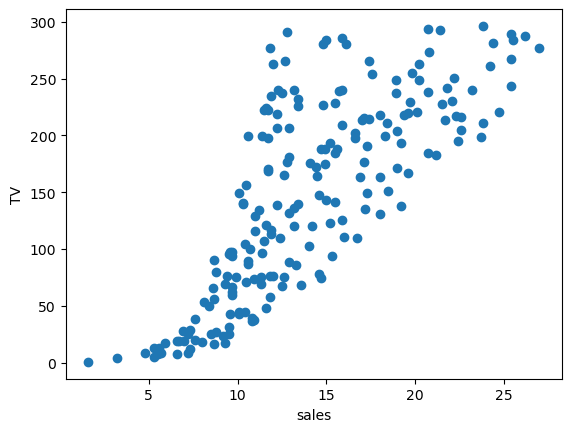

In [117]:
plt.scatter(y=data['TV'],x=data['Sales']);
plt.xlabel('sales')
plt.ylabel('TV')

Text(0, 0.5, 'radio')

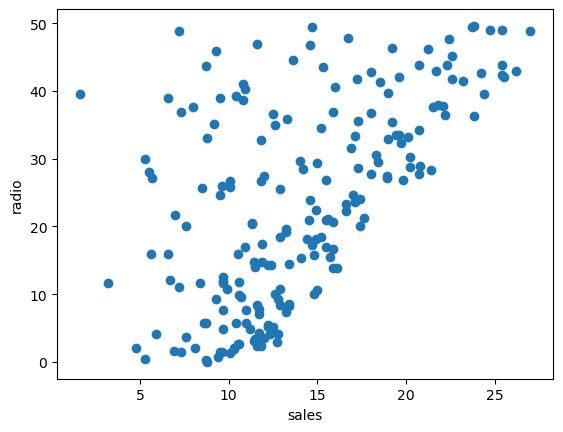

In [118]:
plt.scatter(y=data['Radio'],x=data['Sales']);
plt.xlabel('sales')
plt.ylabel('radio')

Text(0, 0.5, 'Newspaper')

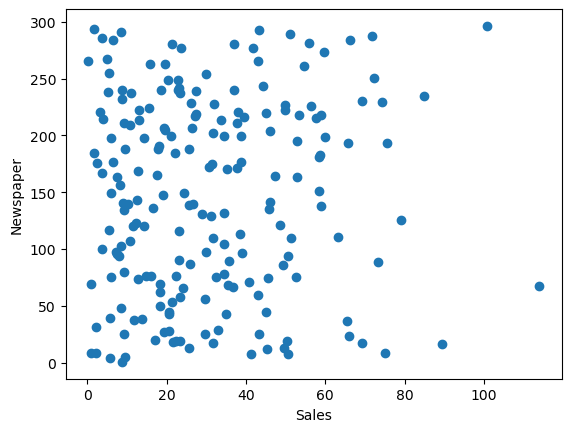

In [119]:
plt.scatter(y=data['TV'],x=data['Newspaper']);
plt.xlabel('Sales')
plt.ylabel('Newspaper')

In [120]:
data.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<Axes: >

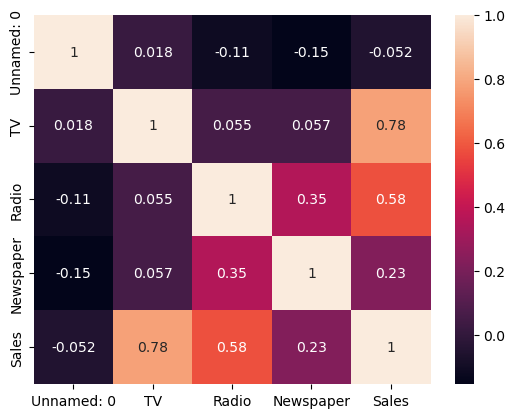

In [121]:
sns.heatmap(data.corr(),annot=True)

In [122]:
x = data.drop('Sales',axis=1)
y = data['Sales']

In [123]:
x

,Unnamed: 0,TV,Radio,Newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [124]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [125]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

In [126]:
model = RandomForestRegressor()

In [127]:
model.fit(xtrain,ytrain)

RandomForestRegressor()

In [128]:
model.score(xtest,ytest)

0.9828080616237165

In [129]:
pred = model.predict(xtest)

In [130]:
pred

array([11.422, 22.733, 13.305,  4.125,  6.153, 14.255, 11.387, 10.93 ,
       12.405, 19.736,  6.789, 19.28 , 25.372, 12.602, 15.026,  9.692,
       23.113, 12.179, 10.272, 14.153, 15.66 , 10.284,  9.849, 22.517,
       19.743, 12.263, 12.47 ,  8.047, 15.793, 15.188,  8.845, 16.669,
        6.234, 15.036, 18.338, 13.338, 12.955,  9.175, 18.287, 24.283,
        6.834, 17.081, 15.666, 22.075, 19.306, 12.772,  9.372, 12.596,
       15.384, 11.211, 11.41 , 10.221,  7.966, 18.947,  9.276, 20.331,
        9.878, 15.316,  8.568, 17.224])